In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, freqz
import wave

In [41]:
# Настройки отображения графиков
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

### Формула КИХ-фильтра 

$y(n)=\sum_{k=0}^{M}b(k)x(n-k)$

### Формула БИХ-фильтра 

$y(n)=\sum_{k=0}^{M}b(k)x(n-k)-\sum_{k=1}^{N}a(k)y(n-k)$

In [60]:
def fir(x, b):
    y = np.zeros(len(x))
    for n in range(len(y)):
        for k, bk in enumerate(b):
            if (n - k) >= 0:
                y[n] += bk * x[n - k]
    return y

'''
    Прямая реализация БИХ фильтра (на каждой
    итерации сначало считается сумма
    произведений сигнала на b коэфициенты)
'''
def iir(x, b, a):
    y = np.zeros(len(x))
    for n in range(len(y)):
        for k, bk in enumerate(b):
            if (n - k) >= 0:
                y[n] += bk * x[n - k]
        for k, ak in enumerate(a):
            if (n - k) >= 0:
                y[n] -= ak * x[n - k]
    return y

## Получение a, b коэфициентов

In [95]:
n = 8

psi = np.linspace(0, np.pi, n + 1, endpoint=False)
p0 = 0.75 * np.exp(1j * psi)
p = np.hstack((p0, np.conj(p0[-1:0:-1])))

gain = 1 + 0.08 * np.random.randn(n)
z = 1 / np.conj(p)
z = np.copy(z)
z[1:n+1] = gain * z[1:n+1]
z[n+1:] = gain[-1::-1] * z[n+1:]

k = np.prod(np.abs(1 / z))

a, b = zpk2tf(z, p, k)

f, h = freqz(b, a, 1024)

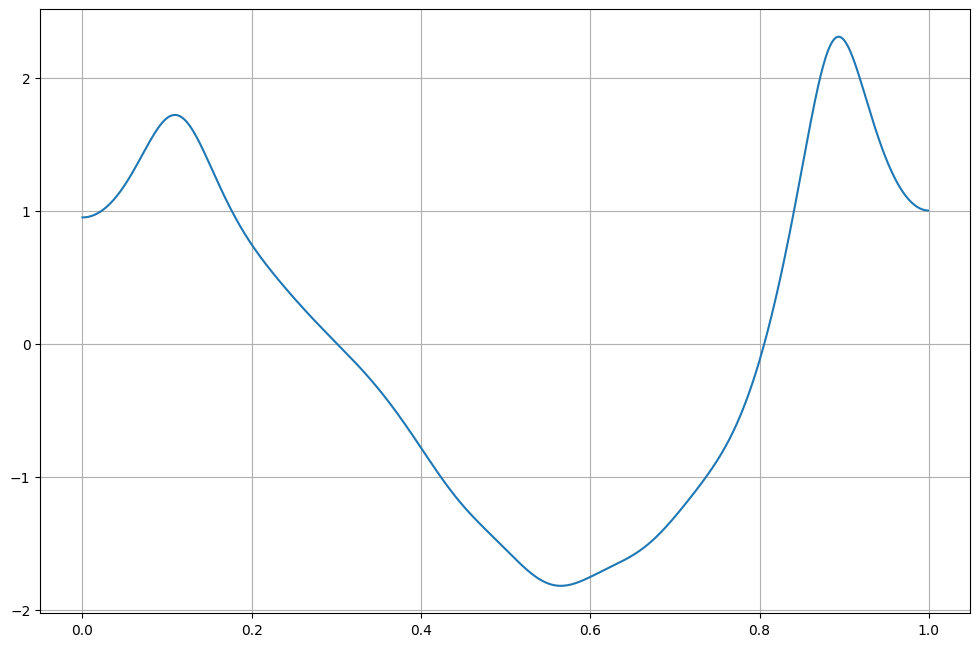

In [96]:
plt.plot(f / np.pi, 10 * np.log10(np.abs(h)))
plt.grid()
plt.show()

In [97]:
audioFile = wave.open("white noise.wav", "rb")
signal = audioFile.readframes(-1)
signal = np.fromstring(signal, "int16")

C:\Users\Денис\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


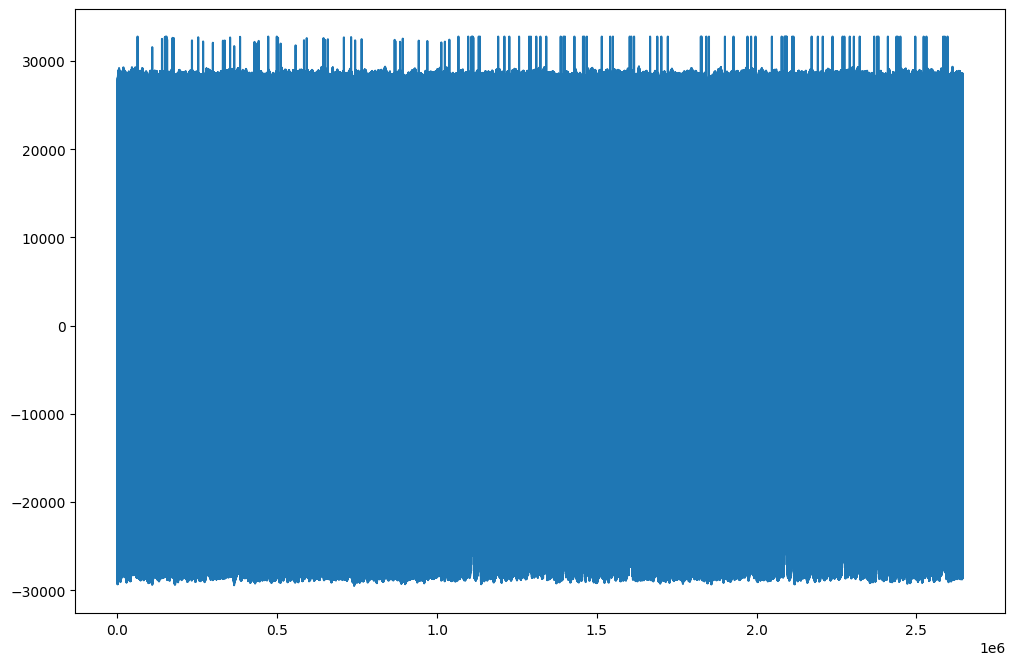

In [98]:
plt.plot(signal)
plt.show()

In [99]:
fs = audioFile.getframerate()
spectrum = np.fft.rfft(signal)
amplitude = np.abs(2 * spectrum / len(signal))
frequency =  np.fft.rfftfreq(len(signal), 1/fs)

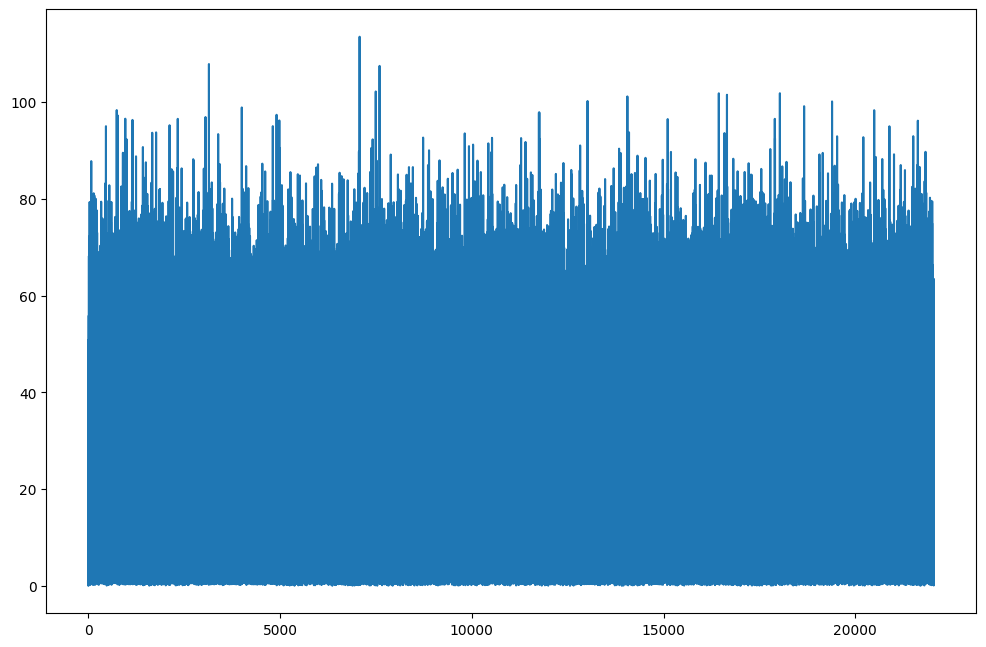

In [100]:
plt.plot(frequency, amplitude)
plt.show()

In [101]:
filteredSignal = fir(signal, b)
#filteredSignal = iir(signal, b, a)

In [102]:
filteredSpectrum = np.fft.rfft(filteredSignal)
filteredAmplitude = np.abs(2 * filteredSpectrum / len(filteredSignal))
filteredFrequency =  np.fft.rfftfreq(len(filteredSignal), 1/fs)

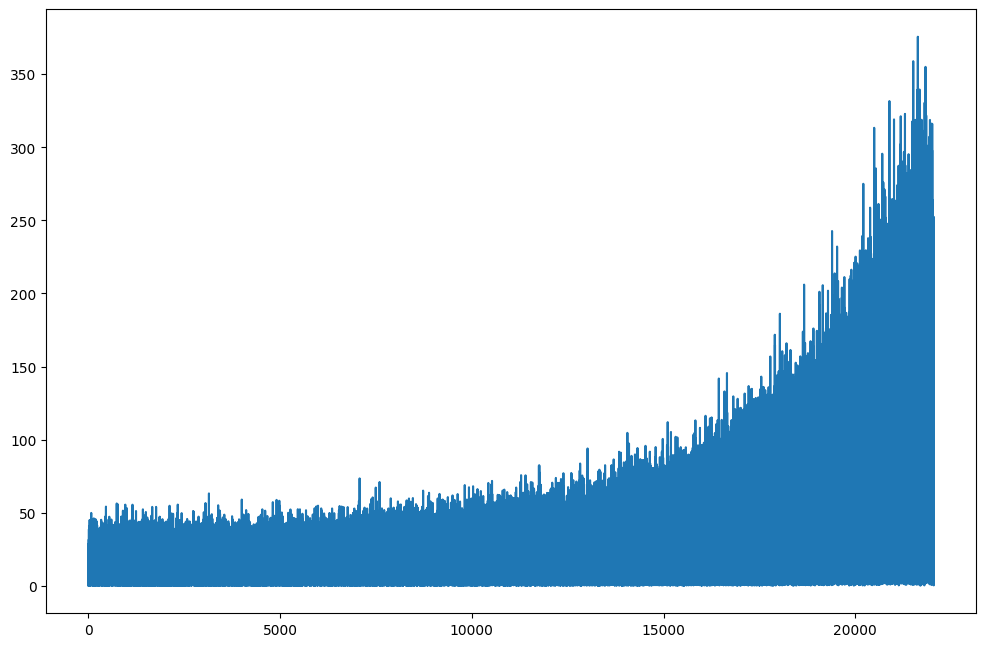

In [103]:
plt.plot(filteredFrequency, filteredAmplitude)
plt.show()

In [104]:
filteredAudioFile = wave.open("filtered white noise.wav", "wb")
filteredAudioFile.setnchannels(audioFile.getnchannels())
filteredAudioFile.setsampwidth(audioFile.getsampwidth())
filteredAudioFile.setframerate(audioFile.getframerate())
filteredAudioFile.writeframes(filteredSignal.tobytes())

In [105]:
filteredAudioFile.close()
audioFile.close()